# Titanic: Machine Learning from Disaster

## Introduction

In [21]:
## Importing the required libraries
###################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [22]:
## Read and Examine the Dataset
###################################

df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [24]:
df.columns = [col.upper() for col in df.columns]

In [25]:
print(df.columns.values)

['PASSENGERID' 'SURVIVED' 'PCLASS' 'NAME' 'SEX' 'AGE' 'SIBSP' 'PARCH'
 'TICKET' 'FARE' 'CABIN' 'EMBARKED']


In [26]:
df.shape

(891, 12)

In [27]:
## Getting information about the missing values and data types in the dateset
###############################################################################

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PASSENGERID  891 non-null    int64  
 1   SURVIVED     891 non-null    int64  
 2   PCLASS       891 non-null    int64  
 3   NAME         891 non-null    object 
 4   SEX          891 non-null    object 
 5   AGE          714 non-null    float64
 6   SIBSP        891 non-null    int64  
 7   PARCH        891 non-null    int64  
 8   TICKET       891 non-null    object 
 9   FARE         891 non-null    float64
 10  CABIN        204 non-null    object 
 11  EMBARKED     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

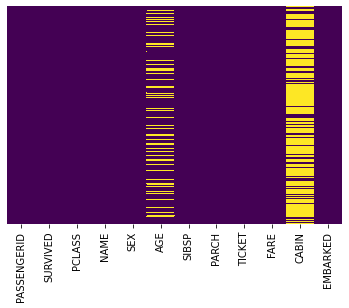

In [28]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [29]:
df.sample(10)

,PASSENGERID,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED
276,277,0,3,"Lindblom, Miss. Augusta Charlotta",female,45.0,0,0,347073,7.7500,NaN,S
320,321,0,3,"Dennis, Mr. Samuel",male,22.0,0,0,A/5 21172,7.2500,NaN,S
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S
750,751,1,2,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.0000,NaN,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,NaN,S
757,758,0,2,"Bailey, Mr. Percy Andrew",male,18.0,0,0,29108,11.5000,NaN,S
104,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S


## 1.Step Exploratory Data Analysis (EDA)

In [30]:
#############################################
## Arrange the columns in the dataset according to the information given in the dictionary of the dataset
#############################################

    
# Cabin bool
df["NEW_CABIN_BOOL"] = df["CABIN"].notnull().astype('int')
# Name count
df["NEW_NAME_COUNT"] = df["NAME"].str.len()
# name word count
df["NEW_NAME_WORD_COUNT"] = df["NAME"].apply(lambda x: len(str(x).split(" ")))
# name dr with .
df["NEW_NAME_DR"] = df["NAME"].apply(lambda x: len([x for x in x.split() if x.startswith("Dr.")]))
# name title
df['NEW_TITLE'] = df.NAME.str.extract(' ([A-Za-z]+)\.', expand=False)
# family size
df["NEW_FAMILY_SIZE"] = df["SIBSP"] + df["PARCH"] + 1
# age_pclass
df["NEW_AGE_PCLASS"] = df["AGE"] * df["PCLASS"]
# is alone
df.loc[((df['SIBSP'] + df['PARCH']) > 0), "NEW_IS_ALONE"] = "NO"
df.loc[((df['SIBSP'] + df['PARCH']) == 0), "NEW_IS_ALONE"] = "YES"
# age level
df.loc[(df['AGE'] < 18), 'NEW_AGE_CAT'] = 'young'
df.loc[(df['AGE'] >= 18) & (df['AGE'] < 56), 'NEW_AGE_CAT'] = 'mature'
df.loc[(df['AGE'] >= 56), 'NEW_AGE_CAT'] = 'senior'
# sex x age
df.loc[(df['SEX'] == 'male') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngmale'
df.loc[(df['SEX'] == 'male') & ((df['AGE'] > 21) & (df['AGE']) <= 50), 'NEW_SEX_CAT'] = 'maturemale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] > 50), 'NEW_SEX_CAT'] = 'seniormale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngfemale'
df.loc[(df['SEX'] == 'female') & ((df['AGE'] > 21) & (df['AGE']) <= 50), 'NEW_SEX_CAT'] = 'maturefemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] > 50), 'NEW_SEX_CAT'] = 'seniorfemale'


In [31]:
df.head()

,PASSENGERID,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,...,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR,NEW_TITLE,NEW_FAMILY_SIZE,NEW_AGE_PCLASS,NEW_IS_ALONE,NEW_AGE_CAT,NEW_SEX_CAT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,23,4,0,Mr,2,66.0,NO,mature,maturemale
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,51,7,0,Mrs,2,38.0,NO,mature,maturefemale
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,22,3,0,Miss,1,78.0,YES,mature,maturefemale
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,44,7,0,Mrs,2,35.0,NO,mature,maturefemale
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,24,4,0,Mr,1,105.0,YES,mature,maturemale


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PASSENGERID          891 non-null    int64  
 1   SURVIVED             891 non-null    int64  
 2   PCLASS               891 non-null    int64  
 3   NAME                 891 non-null    object 
 4   SEX                  891 non-null    object 
 5   AGE                  714 non-null    float64
 6   SIBSP                891 non-null    int64  
 7   PARCH                891 non-null    int64  
 8   TICKET               891 non-null    object 
 9   FARE                 891 non-null    float64
 10  CABIN                204 non-null    object 
 11  EMBARKED             889 non-null    object 
 12  NEW_CABIN_BOOL       891 non-null    int32  
 13  NEW_NAME_COUNT       891 non-null    int64  
 14  NEW_NAME_WORD_COUNT  891 non-null    int64  
 15  NEW_NAME_DR          891 non-null    int

In [33]:
def overview_dataset(dataframe, cat_th=10, car_th=20):
    
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [34]:
cat_cols, num_cols, cat_but_car = overview_dataset(df)
num_cols = [col for col in num_cols if "PASSENGERID" not in col]

Observations: 891
Variables: 22
cat_cols: 14
num_cols: 5
cat_but_car: 3
num_but_cat: 8


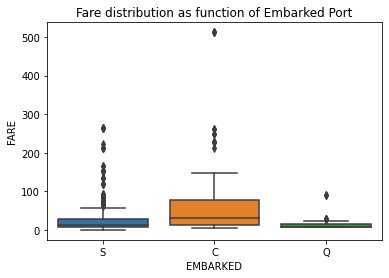

In [35]:
sns.boxplot(x='EMBARKED', y='FARE', data=df)
plt.title("Fare distribution as function of Embarked Port")
plt.show()

In [36]:
def outlier_winsorize(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    df.loc[(df[col] < lower), col] = lower
    df.loc[(df[col] > upper), col] = upper
   

In [37]:
num_cols

['AGE', 'FARE', 'NEW_NAME_COUNT', 'NEW_AGE_PCLASS']

In [38]:
for col in num_cols:
    outlier_winsorize(df,col)

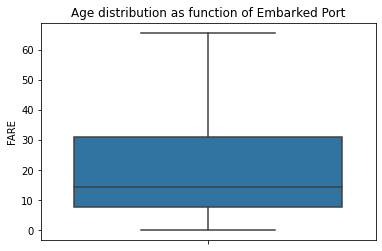

In [39]:
sns.boxplot(y='FARE', data=df)
plt.title("Age distribution as function of Embarked Port")
plt.show()

In [41]:
## Drop the missing values in the "CABIN" column

df.drop("CABIN", inplace=True, axis=1)

In [42]:
remove_cols = ["TICKET", "NAME"]
df.drop(remove_cols, inplace=True, axis=1)

##### As you can see, there are some variables in the NEW_TITLE colon. 
These values were grouped in their own, and their medians were taken, and the missing values were filled with these values.

In [43]:
df["NEW_TITLE"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Mme           1
Lady          1
Capt          1
Jonkheer      1
Ms            1
Sir           1
Don           1
Countess      1
Name: NEW_TITLE, dtype: int64

In [44]:

df["AGE"] = df["AGE"].fillna(df.groupby("NEW_TITLE")["AGE"].transform("median"))


df["NEW_AGE_PCLASS"] = df["AGE"] * df["PCLASS"]
df.loc[(df['AGE'] < 18), 'NEW_AGE_CAT'] = 'young'
df.loc[(df['AGE'] >= 18) & (df['AGE'] < 56), 'NEW_AGE_CAT'] = 'mature'
df.loc[(df['AGE'] >= 56), 'NEW_AGE_CAT'] = 'senior'

df.loc[(df['SEX'] == 'male') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngmale'
df.loc[(df['SEX'] == 'male') & ((df['AGE'] > 21) & (df['AGE']) <= 50), 'NEW_SEX_CAT'] = 'maturemale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] > 50), 'NEW_SEX_CAT'] = 'seniormale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngfemale'
df.loc[(df['SEX'] == 'female') & ((df['AGE'] > 21) & (df['AGE']) <= 50), 'NEW_SEX_CAT'] = 'maturefemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] > 50), 'NEW_SEX_CAT'] = 'seniorfemale'

df = df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0)

In [45]:
pd.isnull(df).sum()

PASSENGERID            0
SURVIVED               0
PCLASS                 0
SEX                    0
AGE                    0
SIBSP                  0
PARCH                  0
FARE                   0
EMBARKED               0
NEW_CABIN_BOOL         0
NEW_NAME_COUNT         0
NEW_NAME_WORD_COUNT    0
NEW_NAME_DR            0
NEW_TITLE              0
NEW_FAMILY_SIZE        0
NEW_AGE_PCLASS         0
NEW_IS_ALONE           0
NEW_AGE_CAT            0
NEW_SEX_CAT            0
dtype: int64

<AxesSubplot:>

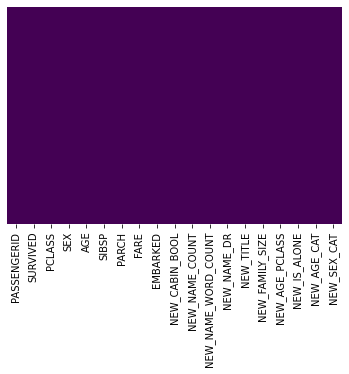

In [46]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [47]:
def label_encoder(df, binary_col):
    labelencoder = LabelEncoder()
    df[binary_col] = labelencoder.fit_transform(df[binary_col])
    return df

In [48]:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float] and df[col].nunique() == 2]

for col in binary_cols:
    df = label_encoder(df, col)

In [49]:
def rare_encoder(df, rare_perc):
    temp_df = df.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

#### Rare Variable Analysis. 
In the "NEW_TITLE" column, there are many values such as dr., col, capt, which are rarely mentioned. We will rare encode this variable.

In [50]:
df = rare_encoder(df, 0.01)

In [51]:
def one_hot_encoder(df, categorical_cols, drop_first=False):
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=drop_first)
    return df

In [52]:
oneHotEncoder_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

#get dummies
df = one_hot_encoder(df, oneHotEncoder_cols)


In [54]:
cat_cols, num_cols, cat_but_car = overview_dataset(df)
num_cols = [col for col in num_cols if "PASSENGERID" not in col]


Observations: 891
Variables: 59
cat_cols: 54
num_cols: 5
cat_but_car: 0
num_but_cat: 54


In [55]:
useless_cols = [col for col in df.columns if df[col].nunique() == 2 and (df[col].value_counts() / len(df) < 0.01).any(axis=None)]

df.drop(useless_cols, axis=1, inplace=True)

In [56]:
df.shape

(891, 48)

In [57]:
df.head(30)

,PASSENGERID,SURVIVED,SEX,AGE,FARE,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_AGE_PCLASS,NEW_IS_ALONE,PCLASS_1,...,NEW_FAMILY_SIZE_5,NEW_FAMILY_SIZE_6,NEW_FAMILY_SIZE_7,NEW_AGE_CAT_mature,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_SEX_CAT_maturefemale,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale
0,1,0,1,22.0,7.2500,0,23.0,66.0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,2,1,0,38.0,65.6344,1,45.0,38.0,0,1,...,0,0,0,1,0,0,1,0,0,0
2,3,1,0,26.0,7.9250,0,22.0,78.0,1,0,...,0,0,0,1,0,0,1,0,0,0
3,4,1,0,35.0,53.1000,1,44.0,35.0,0,1,...,0,0,0,1,0,0,1,0,0,0
4,5,0,1,35.0,8.0500,0,24.0,105.0,1,0,...,0,0,0,1,0,0,0,1,0,0
5,6,0,1,30.0,8.4583,0,16.0,90.0,1,0,...,0,0,0,1,0,0,0,1,0,0
6,7,0,1,54.0,51.8625,1,23.0,54.0,1,1,...,0,0,0,1,0,0,0,0,0,1
7,8,0,1,2.0,21.0750,0,30.0,6.0,0,0,...,1,0,0,0,0,1,0,1,0,0
8,9,1,0,27.0,11.1333,0,45.0,81.0,0,0,...,0,0,0,1,0,0,1,0,0,0
9,10,1,0,14.0,30.0708,0,35.0,28.0,0,0,...,0,0,0,0,0,1,1,0,0,0


### Applying Standart Scaler

In [65]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [66]:
df.head()

,PASSENGERID,SURVIVED,SEX,AGE,FARE,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_AGE_PCLASS,NEW_IS_ALONE,PCLASS_1,...,NEW_FAMILY_SIZE_5,NEW_FAMILY_SIZE_6,NEW_FAMILY_SIZE_7,NEW_AGE_CAT_mature,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_SEX_CAT_maturefemale,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale
0,1,0,1,-0.560638,-0.820552,0,-0.436675,0.066488,0,0,...,0,0,0,1,0,0,0,1,0,0
1,2,1,0,0.663302,2.031623,1,2.248303,-0.790429,0,1,...,0,0,0,1,0,0,1,0,0,0
2,3,1,0,-0.254653,-0.787578,0,-0.558720,0.433739,1,0,...,0,0,0,1,0,0,1,0,0,0
3,4,1,0,0.433813,1.419297,1,2.126258,-0.882241,0,1,...,0,0,0,1,0,0,1,0,0,0
4,5,0,1,0.433813,-0.781471,0,-0.314631,1.260052,1,0,...,0,0,0,1,0,0,0,1,0,0


## MODEL

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    roc_auc_score, confusion_matrix, classification_report, plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

y = df["SURVIVED"]
X = df.drop(["SURVIVED", "PASSENGERID"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

log_model = LogisticRegression().fit(X_train, y_train)
log_model.intercept_
log_model.coef_

array([[-1.12406287, -0.14973789,  0.11107531,  0.36097139,  0.32732235,
        -0.20696961,  0.40983376,  0.72956835,  0.06740092, -0.79667568,
         0.74337768,  0.51854067,  0.61849332, -0.11078372, -0.43765285,
         0.13439661,  0.35500311, -0.27512677, -0.07649001,  0.38315694,
        -0.30637334,  0.25789879,  0.07538099,  0.02285005,  0.05898095,
         0.46337756, -1.01510033,  1.17434619, -0.05186158, -0.88171424,
         0.2448262 , -0.48530299,  0.40983376,  0.45259179,  0.93290942,
         0.81337345, -0.86691898, -0.74106313,  0.69432768,  0.16417803,
        -0.37695328,  0.21306884,  0.16296599, -0.41876378,  0.96139047,
        -0.70529909]])

## PREDICTION

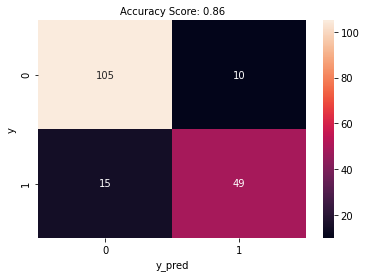

In [61]:

y_pred = log_model.predict(X_test)
y_pred[0:10]
y_test[0:10].to_list()

# sınıf olasılıkları
log_model.predict_proba(X_test)[0:10]

# 1. sınıfa ait olma olasılıkları:
y_prob = log_model.predict_proba(X_test)[:, 1]

##########################
# Başarı Değerlendirme
##########################
# AUC Score için y_prob
y_prob = log_model.predict_proba(X_test)[:, 1]

# Diğer metrikler için y_pred
y_pred = log_model.predict(X_test)


# CONFUSION MATRIX
def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confusion_matrix(y_test, y_pred)


In [67]:
# ACCURACY
accuracy_score(y_test, y_pred)

0.8603351955307262

In [68]:
# PRECISION
precision_score(y_test, y_pred)

0.8305084745762712

In [69]:
# RECALL
recall_score(y_test, y_pred)

0.765625

In [70]:
# F1
f1_score(y_test, y_pred)

0.7967479674796748

In [71]:
# AUC
roc_auc_score(y_test, y_prob)

0.8823369565217393

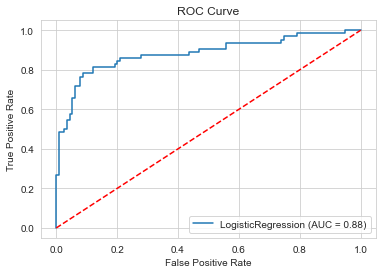

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       115
           1       0.83      0.77      0.80        64

    accuracy                           0.86       179
   macro avg       0.85      0.84      0.85       179
weighted avg       0.86      0.86      0.86       179



In [72]:
# ROC CURVE
plot_roc_curve(log_model, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

In [ ]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()